Best solution: [1 3 3 0 0 0 2 4 2 4]


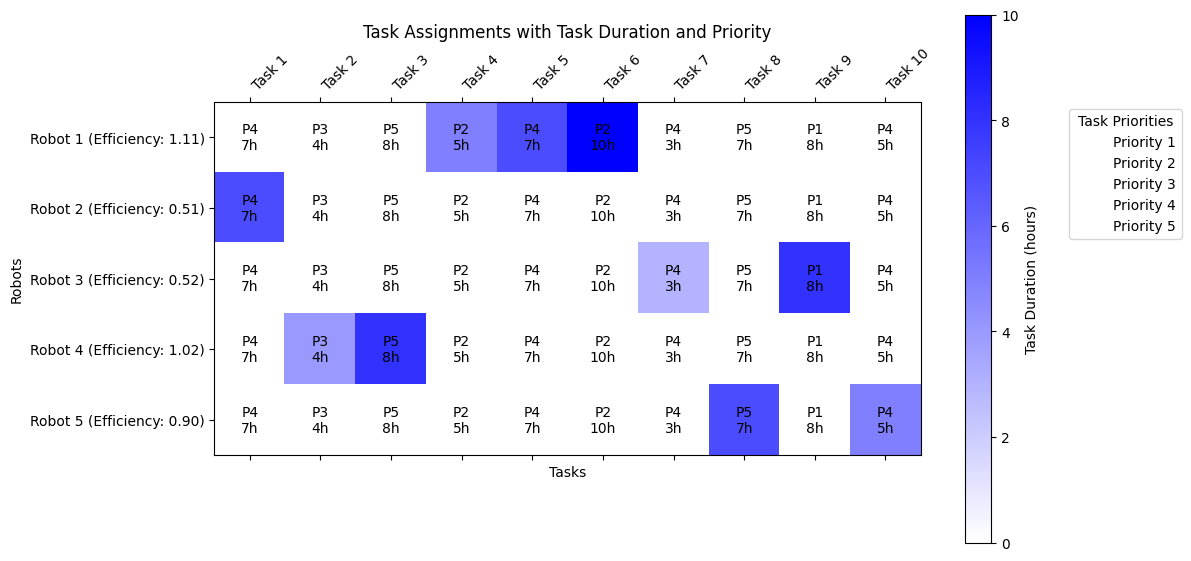

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

# Set random seed for reproducibility
np.random.seed(42)

# Function to generate mock data for tasks and robots
def generate_mock_data(num_tasks=10, num_robots=5):
    task_durations = np.random.randint(1, 11, size=num_tasks)  # Random task durations between 1 and 10 hours
    task_priorities = np.random.randint(1, 6, size=num_tasks)  # Random task priorities between 1 and 5
    robot_efficiencies = np.random.uniform(0.5, 1.5, size=num_robots)  # Random robot efficiencies between 0.5 and 1.5
    return task_durations, task_priorities, robot_efficiencies

def calculate_fitness(individual, task_durations, task_priorities, robot_efficiencies):
    max_time = 0
    total_times = []
    for robot_id in set(individual):
        robot_tasks = [task_durations[i] * task_priorities[i] / robot_efficiencies[robot_id] for i, r in enumerate(individual) if r == robot_id]
        total_time = sum(robot_tasks)
        total_times.append(total_time)
        max_time = max(max_time, total_time)
    workload_balance = np.std(total_times)
    return max_time + workload_balance

def tournament_selection(population, fitness_values, tournament_size):
    selected_parents = []
    for _ in range(len(population)):
        tournament_size = min(tournament_size, len(population))
        tournament_indices = np.random.choice(len(population), size=tournament_size, replace=False)
        tournament_fitness = [fitness_values[i] for i in tournament_indices]
        winner_index = tournament_indices[np.argmin(tournament_fitness)]
        selected_parents.append(population[winner_index])
    return selected_parents

def single_point_crossover(parent1, parent2):
    crossover_point = np.random.randint(1, len(parent1))
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return child1, child2

def mutation(individual, mutation_rate):
    num_mutations = int(len(individual) * mutation_rate)
    mutation_indices = np.random.choice(len(individual), size=num_mutations, replace=False)

    for idx in mutation_indices:
        individual[idx] = np.random.randint(0, 5)

    return individual


def run_genetic_algorithm(task_durations, task_priorities, robot_efficiencies):
    population_size = 50
    n_generations = 100
    tournament_size = 10
    mutation_rate = 0.2

    # Generate initial population
    population = [np.random.randint(0, len(robot_efficiencies), size=len(task_durations)) for _ in range(population_size)]

    for generation in range(n_generations):

        fitness_values = [calculate_fitness(individual, task_durations, task_priorities, robot_efficiencies) for individual in population]

        selected_parents = tournament_selection(population, fitness_values, tournament_size)

        children = []
        for parent1, parent2 in zip(selected_parents[::2], selected_parents[1::2]):
            child1, child2 = single_point_crossover(parent1, parent2)
            children.append(mutation(child1, mutation_rate))
            children.append(mutation(child2, mutation_rate))

        population = children

    best_solution_index = np.argmin([calculate_fitness(individual, task_durations, task_priorities, robot_efficiencies) for individual in population])
    best_solution = population[best_solution_index]

    print("Best solution:", best_solution)

    return best_solution

def visualize_assignments_improved(solution, task_durations, task_priorities, robot_efficiencies):
    # Create a grid for visualization based on the solution provided
    grid = np.zeros((len(robot_efficiencies), len(task_durations)))
    for task_idx, robot_idx in enumerate(solution):
        grid[robot_idx, task_idx] = task_durations[task_idx]

    fig, ax = plt.subplots(figsize=(12, 6))
    cmap = mcolors.LinearSegmentedColormap.from_list("", ["white", "blue"])  # Custom colormap

    # Display the grid with task durations
    cax = ax.matshow(grid, cmap=cmap)
    fig.colorbar(cax, label='Task Duration (hours)')

    # Annotate each cell with task priority and duration
    for i in range(len(robot_efficiencies)):
        for j in range(len(task_durations)):
            task_duration = task_durations[j]
            task_priority = task_priorities[j]
            ax.text(j, i, f'P{task_priority}\n{task_duration}h', ha='center', va='center', color='black')

    # Set the ticks and labels for tasks and robots
    ax.set_xticks(np.arange(len(task_durations)))
    ax.set_yticks(np.arange(len(robot_efficiencies)))
    ax.set_xticklabels([f'Task {i+1}' for i in range(len(task_durations))], rotation=45, ha="left")
    ax.set_yticklabels([f'Robot {i+1} (Efficiency: {eff:.2f})' for i, eff in enumerate(robot_efficiencies)])

    plt.xlabel('Tasks')
    plt.ylabel('Robots')
    plt.title('Task Assignments with Task Duration and Priority')

    # Create a legend for task priorities
    priority_patches = [mpatches.Patch(color='white', label=f'Priority {i}') for i in range(1, 6)]
    plt.legend(handles=priority_patches, bbox_to_anchor=(1.20, 1), loc='upper left', title="Task Priorities")

    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    num_tasks = 10
    num_robots = 5
    task_durations, task_priorities, robot_efficiencies = generate_mock_data(num_tasks, num_robots)

    # Run GA to find the best solution
    best_solution = run_genetic_algorithm(task_durations, task_priorities, robot_efficiencies)

    # Visualize the best solution
    visualize_assignments_improved(best_solution, task_durations, task_priorities, robot_efficiencies)
